In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=5.44732367147143 et b_1=5.33223478201434


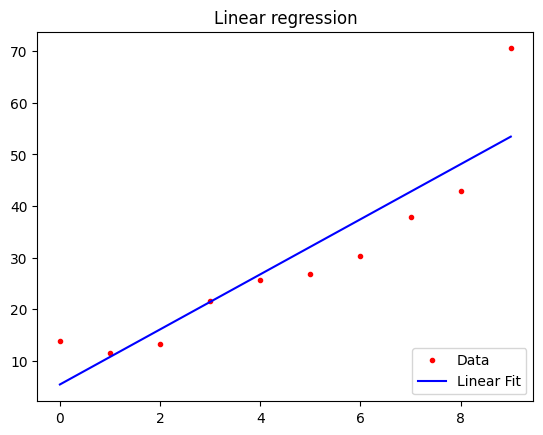

In [27]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



In [ ]:
def print_score(outl = False):
    x, y = generate_data(n_samples=10, outlier = outl)
    lr.fit(x[:, np.newaxis], y)
    print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]) + ' et s2='+str(s2(y, lr.predict(x[:, np.newaxis]))))
    return

for i in range(5):
    print_score(outl=True)   

for i in range(5):
    print_score(outl=False)

# On voit que l'écart type s2 diminue sans outlier et que les coefficients b_0 et b_1 sont plus stables




b_0=5.663485622692868 et b_1=5.518163411002897 et s2=32.66193520911535
b_0=8.96091044252163 et b_1=4.586444395944223 et s2=31.328289898974113
b_0=4.752238538754181 et b_1=5.461092059967633 et s2=53.91412553879402
b_0=4.793782299966072 et b_1=5.319283522463286 et s2=29.84443298002992
b_0=7.320590754707251 et b_1=5.235767221997859 et s2=34.43755771361494
b_0=11.28100419401662 et b_1=3.6580116054477196 et s2=9.402143578563502
b_0=8.839030818309041 et b_1=4.234015239155198 et s2=13.978959395391147
b_0=11.563349076662316 et b_1=3.8309054745353253 et s2=11.010603318564753
b_0=11.491759700358703 et b_1=3.9664599624294197 et s2=15.113121950896439
b_0=9.73567886639007 et b_1=4.084472183176642 et s2=7.110427548283919


La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  $\hat{y_{(i)j}}$ est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des $e_{(i)j}$ est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [70]:
x, y = generate_data(n_samples=10, outlier=True)

def res_i(x,y,i):
    x_ni = np.delete(x, i)
    y_ni = np.delete(y, i)
    lr.fit(x_ni[:, np.newaxis], y_ni)
    y_pred = lr.predict(x[:, np.newaxis])
    return y[i] - y_pred[i]

for i in range(len(x)):
    print('residu de l\'observation '+str(i)+' = '+str(res_i(x,y,i)))

# 4.2.b On voit que le résidu de l'outlier est très grand (en valeur absolue) par rapport aux autres résidus

residu de l'observation 0 = 8.616885942740318
residu de l'observation 1 = -2.9882803132088416
residu de l'observation 2 = 2.9642664086749697
residu de l'observation 3 = -2.8556963464798777
residu de l'observation 4 = 0.9247635072013836
residu de l'observation 5 = -2.6186581082117897
residu de l'observation 6 = -1.4384726946467197
residu de l'observation 7 = -11.7000609713007
residu de l'observation 8 = -8.839852018764809
residu de l'observation 9 = 24.011014173496733


#### <span style="color:blue">REPONSE 4.2.a :</span> 


#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

Cook de l'observation 0 = 0.26176537630173596
Cook de l'observation 1 = 0.022644523239607577
Cook de l'observation 2 = 0.015760468393817194
Cook de l'observation 3 = 0.010592049553206879
Cook de l'observation 4 = 0.0008991806354822244
Cook de l'observation 5 = 0.007210131408581447
Cook de l'observation 6 = 0.002687566363188039
Cook de l'observation 7 = 0.24553358509397347
Cook de l'observation 8 = 0.19815749513829073
Cook de l'observation 9 = 2.0325092053079503


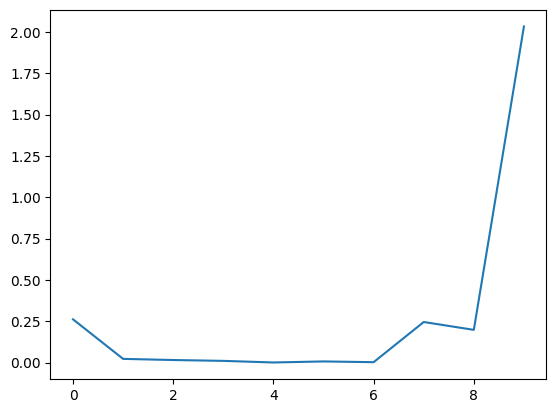

In [77]:
lri = LinearRegression()

def cook(x, y, i):
    x_ni = np.delete(x, i)
    y_ni = np.delete(y, i)
    lr.fit(x[:, np.newaxis], y)
    lri.fit(x_ni[:, np.newaxis], y_ni)
    y_pred = lr.predict(x[:, np.newaxis])
    y_predi = lri.predict(x[:, np.newaxis])
    Di = np.sum((y_pred - y_predi)**2)/(2*s2(y, y_pred))
    return Di

Cook = np.zeros(len(x))

for i in range(len(x)):
    Cook[i] = cook(x, y, i)
    print('Cook de l\'observation '+str(i)+' = '+str(Cook[i]))

plt.plot(Cook)

#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [ ]:
...

## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...

In [79]:
print("\hat{y}")
$\hat{y}$


<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_166470/3712520270.py:1: SyntaxWarning: invalid escape sequence '\h'
  print("\hat{y}")


SyntaxError: invalid syntax (3712520270.py, line 2)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.
